In [1]:
%matplotlib inline
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
url = "sonar.all-data.txt"
dataset = pandas.read_csv(url, header=None)

In [3]:
print(dataset.shape)

(208, 61)


In [5]:
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [6]:
print(dataset.head(20))

        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10  0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11  0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.05

In [7]:
print(dataset.describe())

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9      ...              50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.0851

In [8]:
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


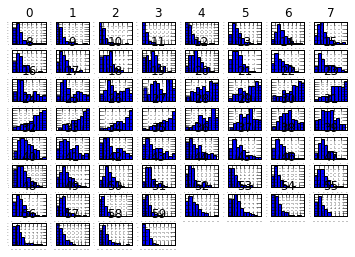

In [10]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

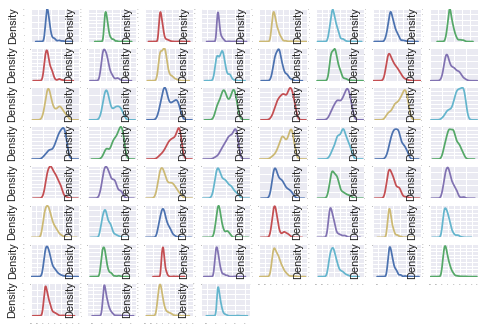

In [12]:
# density
dataset.plot(kind='density' , subplots=True, layout=(8,8), sharex=False, legend=False,
    fontsize=1)
plt.show()

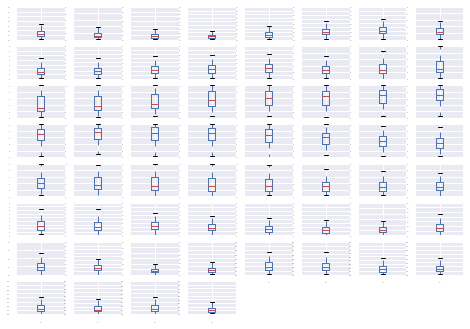

In [13]:
# box and whisker plots
dataset.plot(kind= 'box' , subplots=True, layout=(8,8), sharex=False, sharey=False,
    fontsize=1)
plt.show()

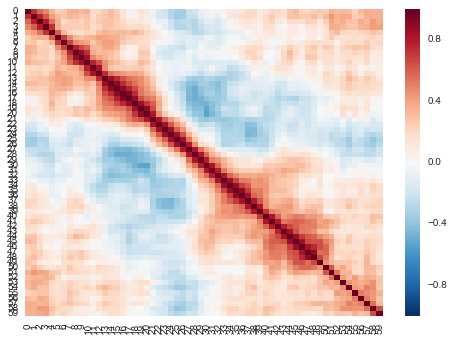

In [14]:
import seaborn
# correlation matrix
seaborn.heatmap(dataset.corr())
plt.show()

In [15]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

In [16]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring =  'accuracy'

In [17]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

In [18]:
results = []
names = []
for name, model in models:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.723529 (0.088508)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


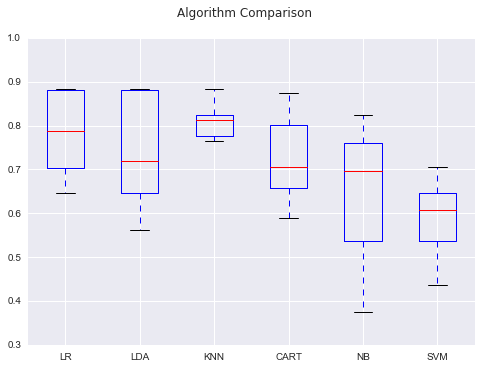

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.711765 (0.118337)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


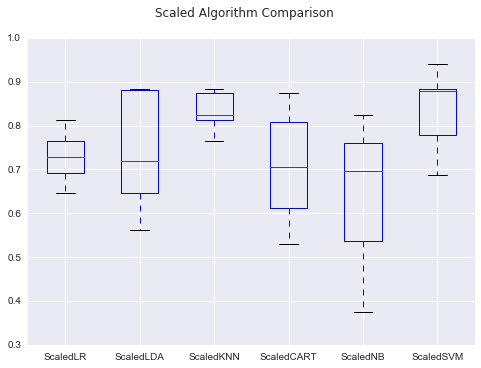

In [25]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.849398 using {'n_neighbors': 1}
0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


In [28]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.867470 using {'kernel': 'rbf', 'C': 1.5}
0.758456 (0.099483) with: {'kernel': 'linear', 'C': 0.1}
0.529412 (0.118825) with: {'kernel': 'poly', 'C': 0.1}
0.573162 (0.130930) with: {'kernel': 'rbf', 'C': 0.1}
0.409559 (0.073625) with: {'kernel': 'sigmoid', 'C': 0.1}
0.746324 (0.109507) with: {'kernel': 'linear', 'C': 0.3}
0.642647 (0.132187) with: {'kernel': 'poly', 'C': 0.3}
0.765809 (0.091692) with: {'kernel': 'rbf', 'C': 0.3}
0.409559 (0.073625) with: {'kernel': 'sigmoid', 'C': 0.3}
0.740074 (0.082636) with: {'kernel': 'linear', 'C': 0.5}
0.680147 (0.098595) with: {'kernel': 'poly', 'C': 0.5}
0.788235 (0.064190) with: {'kernel': 'rbf', 'C': 0.5}
0.409559 (0.073625) with: {'kernel': 'sigmoid', 'C': 0.5}
0.746691 (0.084198) with: {'kernel': 'linear', 'C': 0.7}
0.740074 (0.127908) with: {'kernel': 'poly', 'C': 0.7}
0.812500 (0.085513) with: {'kernel': 'rbf', 'C': 0.7}
0.409559 (0.073625) with: {'kernel': 'sigmoid', 'C': 0.7}
0.758824 (0.096520) with: {'kernel': 'linear', 'C': 0.9

In [29]:
# ensembles
ensembles = []
ensembles.append(( 'AB' , AdaBoostClassifier()))
ensembles.append(( 'GBM' , GradientBoostingClassifier()))
ensembles.append(( 'RF' , RandomForestClassifier()))
ensembles.append(( 'ET' , ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.819853 (0.058293)
GBM: 0.848162 (0.106352)
RF: 0.783456 (0.104096)
ET: 0.800368 (0.091026)


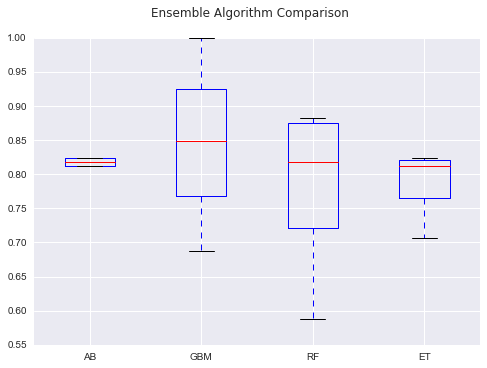

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Ensemble Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Accuracy Score")
print(accuracy_score(Y_validation, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_validation, predictions))
print("classification_report")
print(classification_report(Y_validation, predictions))

Accuracy Score
0.857142857143
Confusion Matrix
[[23  4]
 [ 2 13]]
classification_report
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



## summary


#### Problem Definition (Sonar return data).
#### Loading the Dataset.
#### Analyze Data (same scale but di↵erent distributions of data).
#### Evaluate Algorithms (KNN looked good).
#### Evaluate Algorithms with Standardization (KNN and SVM looked good).
#### Algorithm Tuning (K=1 for KNN was good, SVM with an RBF kernel and C=1.5 was best).
#### Ensemble Methods (Bagging and Boosting, not quite as good as SVM).
#### Finalize Model (use all training data and confirm using validation dataset).
